<a href="https://colab.research.google.com/github/fiamma-rivero/proyecto-final-ds/blob/main/Proyecto_Final_Rivero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Amazon Prime Users**

# Abstract

**Amazon Prime Users**

El siguiete dataset nos proporciona informacion de 2500 usuarios de Amazon Prime distribuida en 19 columas.Cada registro corresponde a un usuario diferente e incluyen datos claves para el analisis como "plan de suscripcion", "Frecuencia de uso", "genero favorito", etc.
Se analizará la información para descubrir como los usuarios interactúan con la plataforma, que dispositivos prefieren utilizar, que membresías y opción de pago prefieren.
En resumen, esta base de datos ofrece un amplio espectro de datos que pueden ser utilizados para analizar el comportamiento de los usuarios de Amazon Prime, proporcionando oportunidades para realizar análisis de correlaciones, segmentación de clientes y estudios sobre la satisfacción y retención.


El dataset fue obtenido desde https://www.kaggle.com/datasets

**Diccionaro de datos variable**

  User id: numero de identificaicon unico

  Name: nombre

  Email Address: direccion de correo

  Username:	nombre de usuario

  Date of Birth: fecha de nacimiento

  Gender:	genero

  Location: ubicacion

  Membership Start Date: fecha de comienzo de membresia

  Membership End Date: fecha fin de membresia

  Subscription Plan: tipo de plan

  Payment Information: forma de pago

  Renewal Status: tipo de renovacion
  
  Usage Frequency: frecuencia de uso

  Purchase History: historial de compras

  Favorite Genres: generos favoritos

  Devices Used: dispositivos utilizados

  Engagement Metrics: metricas de participacion

  Feedback/Ratings: opinion del usuario

  Customer Support Interactions: Interaccion con soporte tecnico.

# Librerias importadas

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score

In [4]:
#importacion del dataset
df= pd.read_csv('/content/amazon_prime_users.csv')
df.head()

,User ID,Name,Email Address,Username,Date of Birth,Gender,Location,Membership Start Date,Membership End Date,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions
0,1,Ronald Murphy,williamholland@example.com,williamholland,1953-06-03,Male,Rebeccachester,2024-01-15,2025-01-14,Annual,Mastercard,Manual,Regular,Electronics,Documentary,Smart TV,Medium,3.6,3
1,2,Scott Allen,scott22@example.org,scott22,1978-07-08,Male,Mcphersonview,2024-01-07,2025-01-06,Monthly,Visa,Manual,Regular,Electronics,Horror,Smartphone,Medium,3.8,7
2,3,Jonathan Parrish,brooke16@example.org,brooke16,1994-12-06,Female,Youngfort,2024-04-13,2025-04-13,Monthly,Mastercard,Manual,Regular,Books,Comedy,Smart TV,Low,3.3,8
3,4,Megan Williams,elizabeth31@example.net,elizabeth31,1964-12-22,Female,Feliciashire,2024-01-24,2025-01-23,Monthly,Amex,Auto-renew,Regular,Electronics,Documentary,Smart TV,High,3.3,7
4,5,Kathryn Brown,pattersonalexandra@example.org,pattersonalexandra,1961-06-04,Male,Port Deborah,2024-02-14,2025-02-13,Annual,Visa,Auto-renew,Frequent,Clothing,Drama,Smart TV,Low,4.3,1


In [5]:
#utilizamos el metodo shape para mostrar la dimension del dataset
df.shape

(2500, 19)

In [6]:
#utilizamos el metodo describe para mostrar un resumen de los datos estadisticos del dataset
df.describe()

,User ID,Feedback/Ratings,Customer Support Interactions
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,4.004760,4.951600
std,721.83216,0.580769,3.191572
min,1.00000,3.000000,0.000000
25%,625.75000,3.500000,2.000000
50%,1250.50000,4.000000,5.000000
75%,1875.25000,4.500000,8.000000
max,2500.00000,5.000000,10.000000


In [7]:
#utilizamos el metodo info para saber si existen valores nulos en nuestro dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   User ID                        2500 non-null   int64  
 1   Name                           2500 non-null   object 
 2   Email Address                  2500 non-null   object 
 3   Username                       2500 non-null   object 
 4   Date of Birth                  2500 non-null   object 
 5   Gender                         2500 non-null   object 
 6   Location                       2500 non-null   object 
 7   Membership Start Date          2500 non-null   object 
 8   Membership End Date            2500 non-null   object 
 9   Subscription Plan              2500 non-null   object 
 10  Payment Information            2500 non-null   object 
 11  Renewal Status                 2500 non-null   object 
 12  Usage Frequency                2500 non-null   o

# Hipotesis planteadas:



1.Los usuarios de mayor edad tienden a utilizar dispositivos de visualización más tradicionales, como Smart TV, mientras que los usuarios más jóvenes prefieren dispositivos portátiles, como smartphones y tablets.

2.Los hombres tienen una mayor frecuencia de uso de la plataforma en comparación con las mujeres.

3.A mayor número de interacciones con el soporte técnico, menor será la calificación (feedback) otorgada por el usuario



# **GRAFICOS CON SEABRON**

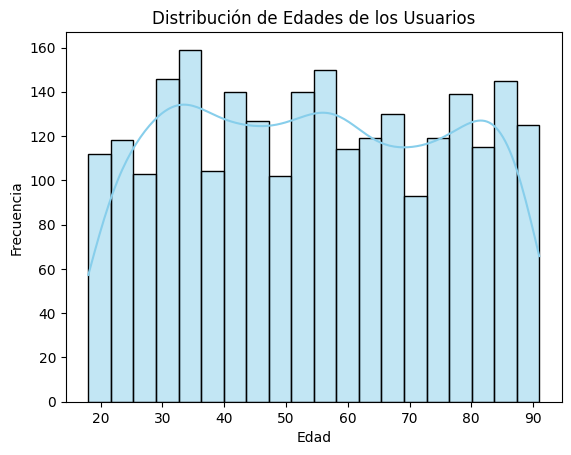

In [8]:
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'])

df['Age'] = (pd.to_datetime('today') - df['Date of Birth']).dt.days // 365

sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribución de Edades de los Usuarios')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

**interpretacion**

Este gráfico muestra cómo se distribuyen las edades de los usuarios de Amazon Prime.
La distribución es bastante uniforme en varios rangos de edad, lo que indica que hay usuarios en casi todos los grupos etarios, desde los 20 hasta los 90 años.
Hay un nivel pico en los usuarios que tienen entre 30 y 40 años , lo que sugiere que este grupo etario podría ser el más común entre los usuarios.
Después de los 40 años, la distribución se mantiene relativamente estable, aunque se observan ligeras variaciones entre los diferentes grupos de edad.

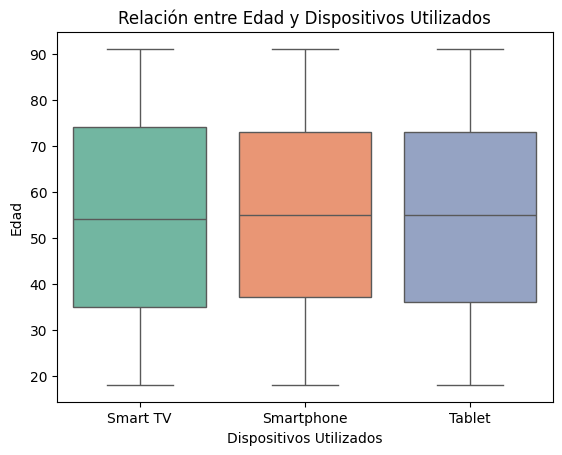

In [9]:
sns.boxplot(x='Devices Used', y='Age', data=df, hue='Devices Used', palette='Set2', legend=False)
plt.title('Relación entre Edad y Dispositivos Utilizados')
plt.xlabel('Dispositivos Utilizados')
plt.ylabel('Edad')
plt.show()


**interpretacion**

 El boxplot muestra la relación entre la edad y el tipo de dispositivo utilizado.

 Mediana (línea central en cada caja) :

Los usuarios que utilizan Smart TV tienen una mediana de edad cercana a los 50 años , lo que indica que este grupo de usuarios es generalmente mayor.
Los usuarios que utilizan Smartphone también tienen una mediana cercana a los 50 años , pero ligeramente más baja en comparación con los de Smart TV.
Los usuarios que utilizan Tablet tienen una mediana de edad similar a los otros dos dispositivos, mostrando que este dispositivo es popular entre un rango de edad intermedio.
Rango intercuartil (caja) :

Para todos los dispositivos, el rango intercuartil (los valores que se encuentran entre el 25% y el 75%) es bastante amplio, indicando que personas de diversas edades utilizan estos dispositivos.
Smart TV parece tener el rango más amplio, lo que significa que es utilizado por un grupo de personas más diverso en términos de edad.
Rangos extremos (bigotes) :

Todos los dispositivos presentan bigotes que llegan hasta los 90 años, lo que indica que hay personas mayores que utilizan estos dispositivos.
El rango de edad más bajo, en todos los casos, comienza alrededor de los 20 años, aunque los jóvenes no parecen ser el grupo mayoritario en ninguno de los dispositivos.

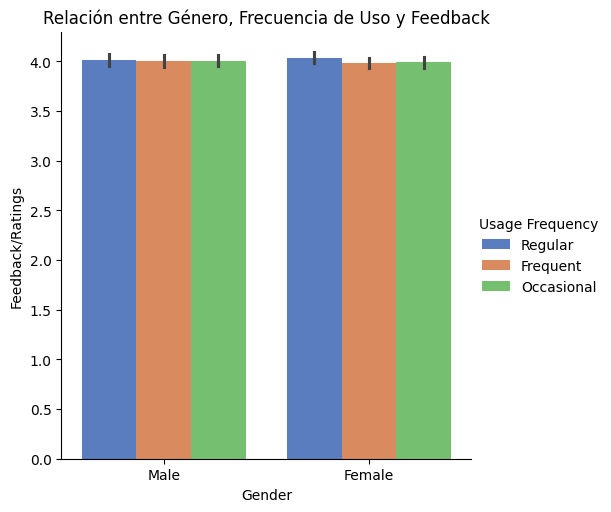

In [10]:
sns.catplot(x='Gender', y='Feedback/Ratings', hue='Usage Frequency', kind='bar', data=df, palette='muted')
plt.title('Relación entre Género, Frecuencia de Uso y Feedback')
plt.show()


**interpretacion**

Este gráfico indica que ni el género ni la frecuencia de uso parecen tener un impacto significativo en las calificaciones de retroalimentación . Tanto hombres como mujeres, y tanto usuarios ocasionales como regulares, tienden a dar calificaciones similares al servicio. Esto podría indicar una experiencia de usuario relativamente homogénea en cuanto a satisfacción, sin grandes diferencias en cómo se percibe el servicio según género o frecuencia de uso.

# **GRAFICOS CON MATPLOTLIB**

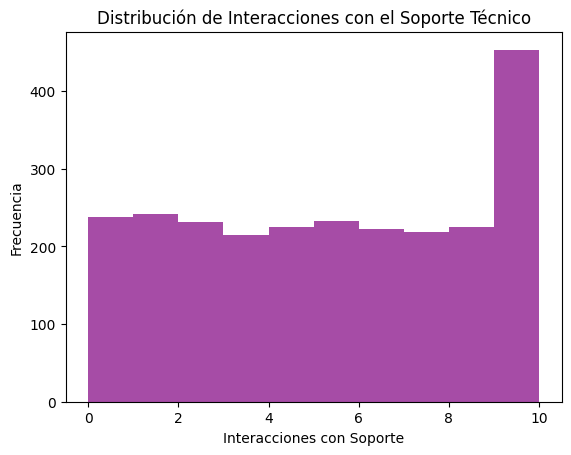

In [11]:
plt.hist(df['Customer Support Interactions'], bins=10, color='purple', alpha=0.7)
plt.title('Distribución de Interacciones con el Soporte Técnico')
plt.xlabel('Interacciones con Soporte')
plt.ylabel('Frecuencia')
plt.show()


**interpretacion**

Este histograma muestra la frecuencia con la que los usuarios interactúan con el soporte técnico. Si observamos la mayoría de los usuarios tiene pocas interacciones con el soporte, lo que  podríamos concluir que los problemas con el servicio son poco frecuentes. Sin embargo, si hay una cola larga de usuarios con muchas interacciones, esto nos podría indicar la presencia de un subgrupo de usuarios con problemas recurrentes que afectan su experiencia.

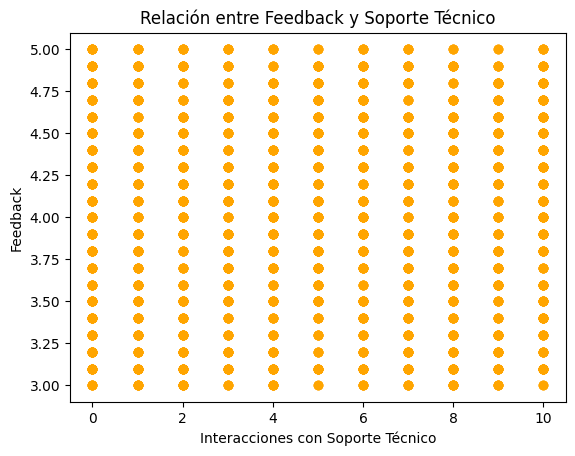

In [12]:
plt.scatter(df['Customer Support Interactions'], df['Feedback/Ratings'], color='orange')
plt.title('Relación entre Feedback y Soporte Técnico')
plt.xlabel('Interacciones con Soporte Técnico')
plt.ylabel('Feedback')
plt.show()


In [13]:
correlation = df['Customer Support Interactions'].corr(df['Feedback/Ratings'])
print("Coeficiente de correlación:", correlation)


Coeficiente de correlación: 0.008025795715230214


**interpretacion**

 El gráfico de dispersión nos permite visualizar si existe una compensación entre la cantidad de interacciones con el soporte técnico y la calificación que los usuarios otorgan (feedback).

 En este caso podemos observar que no existe una correlacion entre las variables.

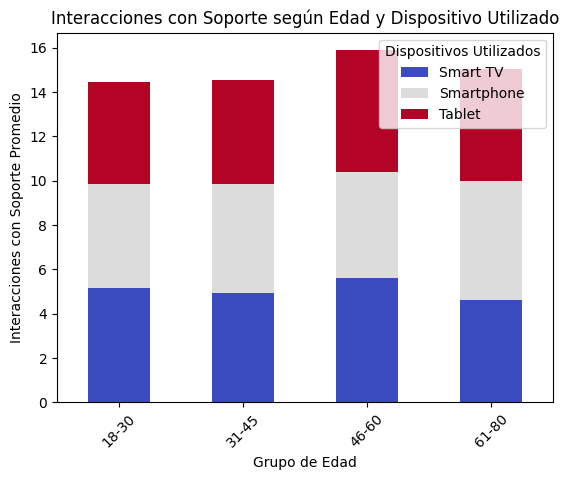

In [14]:
# Crear grupos de edad para hacer el gráfico más interpretativo
df['Age Group'] = pd.cut(df['Age'], bins=[18, 30, 45, 60, 80], labels=['18-30', '31-45', '46-60', '61-80'])

# Crear un gráfico de barras apiladas con dispositivos utilizados y segmentado por grupo de edad
devices_interactions = df.groupby(['Age Group', 'Devices Used'], observed=False)['Customer Support Interactions'].mean().unstack()
devices_interactions.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Interacciones con Soporte según Edad y Dispositivo Utilizado')
plt.xlabel('Grupo de Edad')
plt.ylabel('Interacciones con Soporte Promedio')
plt.xticks(rotation=45)
plt.legend(title='Dispositivos Utilizados')
plt.show()


**interpretacion**

Los usuarios mayores que utilizan dispositivos como Smart TVs parecen tener más interacciones con el soporte técnico, mientras que los usuarios más jóvenes que usan teléfonos inteligentes tienden a tener menos problemas. Esto podría indicar que los dispositivos más tradicionales (como Smart TV) presentan más dificultades técnicas, especialmente para usuarios de mayor edad.

# Modelo Analítico

**Contexto Analitico:** Se utilizará un modelo de clasificacion para predecir la frecuencia de uso de los usuarios de Amazon Prime. Se utilizara un algoritmo de clasificacion random forest.

**Contexto Comercial:** En el contexto comercial comprender la frecuencia de uso de mis usuarios permite segmentar a los usuarios según su nivel de actividad. Esta segmentación ayuda a personalizar las campañas de marketing,  identificar a usuarios que podrían estar en riesgo de abandono, anticipar las necesidades de soporte preventivo en función de los patrones de uso, etc.


In [15]:
# Seleccionar las características (X) y la variable objetivo (y)
X = df[['Engagement Metrics','Customer Support Interactions','Age Group','Feedback/Ratings']]
y = df['Usage Frequency']  # Columna objetivo


In [16]:
# Identificar las variables categóricas
categorical_columns = df.select_dtypes(include=['object']).columns
print("Columnas categóricas:", categorical_columns)
# Crear el codificador
label_encoder = LabelEncoder()


Columnas categóricas: Index(['Name', 'Email Address', 'Username', 'Gender', 'Location',
       'Membership Start Date', 'Membership End Date', 'Subscription Plan',
       'Payment Information', 'Renewal Status', 'Usage Frequency',
       'Purchase History', 'Favorite Genres', 'Devices Used',
       'Engagement Metrics'],
      dtype='object')


In [17]:
# Codificar columnas categoricas
df['Usage Frequency'] = label_encoder.fit_transform(df['Usage Frequency'])
df['Engagement Metrics'] = label_encoder.fit_transform(df['Engagement Metrics'])
df['Renewal Status'] = label_encoder.fit_transform(df['Renewal Status'])
df['Devices Used'] = label_encoder.fit_transform(df['Devices Used'])
df['Age Group'] = label_encoder.fit_transform(df['Age Group'])
X = df[['Usage Frequency','Engagement Metrics','Renewal Status','Age Group']]
X


,Usage Frequency,Engagement Metrics,Renewal Status,Age Group
0,2,2,1,3
1,2,2,1,2
2,2,1,1,0
3,2,0,0,2
4,0,1,0,3
...,...,...,...,...
2495,0,2,0,2
2496,0,2,1,1
2497,0,1,1,2
2498,2,0,1,2


In [18]:
# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [19]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [20]:

# Ajustar modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [21]:
# Predicciones en el conjunto de entrenamiento
y_train_pred = model.predict(X_train)


In [22]:
# Predicciones en el conjunto de prueba
y_pred = model.predict(X_test)


In [23]:
# Calcular el accuracy en el conjunto de entrenamiento
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Accuracy en el conjunto de entrenamiento: {train_accuracy:.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy en el conjunto de entrenamiento: 1.0000
Confusion Matrix:
 [[258   0   0]
 [  0 262   0]
 [  0   0 230]]
Classification Report:
               precision    recall  f1-score   support

    Frequent       1.00      1.00      1.00       258
  Occasional       1.00      1.00      1.00       262
     Regular       1.00      1.00      1.00       230

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



In [24]:
# Evaluar precisión
print(f'Accuracy en el conjunto de prueba: {accuracy_score(y_test, y_pred)}')


Accuracy en el conjunto de prueba: 1.0


In [25]:
scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-validation scores: {scores}")

Cross-validation scores: [1. 1. 1. 1. 1.]


#Conclusion


El modelo de clasificacion arroja una precision del 100% de la variable frecuencia de uso.
La frecuencia de uso nos permite segmentar a los usuarios, y personalizar las campañas, asegurando que cada grupo reciba contenido relevante en función de su frecuencia de uso. Lo que permitira la fidelizacion de los usuarios y aumentar el compromiso de los mismos a traves de las estrategias aplicadas.